In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix,classification_report
#Import all algorithms libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Jforce task/lending_club_loans .csv")

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#To see numbers  of rows and column
df.shape

(42542, 115)

In [6]:
#To see information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [7]:
#To see statistical information about the dataset
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [8]:
#Now Cleaning the data
#Checking if null value is present or not
df.isnull().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 115, dtype: int64

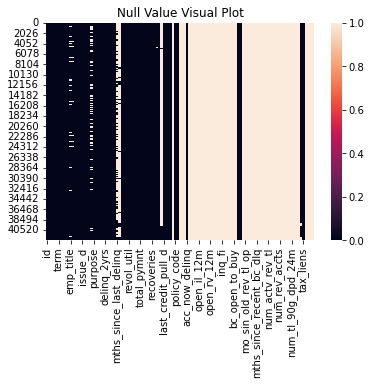

In [9]:
#To visualize the null value
sb.heatmap(df.isnull())
plt.title("Null Value Visual Plot")
plt.show()

In [10]:
#Total percentage of null values in the data
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.49505205086329007

In [11]:
#Creating a dataframe to display percentage of null values in each column
null= pd.DataFrame()
null['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])

null['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
null

,Percentage of null values,No.of columns
0,10% or less,57
1,20% or less,57
2,30% or less,57
3,40% or less,58
4,50% or less,58
5,60% or less,58
6,70% or less,59


As we can see above dataframe the distribution on null value on the basis of null values

As we can see there are 58 columns having null value under 40%

So we are going to consider 58 columns only

In [12]:
# Considering only those columns which have null values less than 40% in that particular column
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]

In [13]:
#To see numbers  of rows and column
df.shape

(42542, 58)

In [14]:
#To check the objects
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts())
    print('*********')

1077501                                    1
540348                                     1
540300                                     1
540270                                     1
540280                                     1
                                          ..
769217                                     1
770000                                     1
765994                                     1
769973                                     1
Total amount funded in policy code 2: 0    1
Name: id, Length: 42538, dtype: int64
*********
 36 months    31534
 60 months    11001
Name: term, dtype: int64
*********
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64
*********
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
*********
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    22

In [15]:
# After observing the above output, we are dropping columns which are not important and which doesn't add value to our use case.
df.drop(['emp_title','pymnt_plan','desc','title', 'zip_code', 'addr_state', 'initial_list_status','application_type'],axis=1,inplace=True)

In [16]:
# Checking some numerical columns
col = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens']
for i in col:
    print(df[i].value_counts())
    print('**********')

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64
**********
0.0    42390
Name: chargeoff_within_12_mths, dtype: int64
**********
0.0    42390
Name: collections_12_mths_ex_med, dtype: int64
**********
0.0       42504
27.0          1
6053.0        1
Name: delinq_amnt, dtype: int64
**********
1.0    42535
Name: policy_code, dtype: int64
**********
0.0    42429
1.0        1
Name: tax_liens, dtype: int64
**********


In [17]:
# There are also few not so useful numerical columns.We are dropping these numerical columns after examining them. 
df.drop(['acc_now_delinq','chargeoff_within_12_mths','collection_recovery_fee',
         'collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1,inplace=True)

In [18]:
df.shape

(42542, 43)

In [19]:
# Checking for null values
# Percentage of null values
x= (df.isnull().sum()/df.shape[0])*100
y= x[x>0.05]
y= pd.DataFrame(y,columns=['Percentage of null values'])
y.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
pub_rec_bankruptcies,3.225048
emp_length,2.630342
revol_util,0.228010
last_pymnt_d,0.211556
delinq_2yrs,0.084622
earliest_cr_line,0.084622
inq_last_6mths,0.084622
open_acc,0.084622
pub_rec,0.084622
total_acc,0.084622


In [20]:
# All these columns are based on future transactions(We only want data that contains info before charging off a loan
df.drop(['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries'],inplace=True,axis=1)

In [21]:
df.drop(['id','url'],axis=1,inplace=True)


In [22]:
df.shape

(42542, 35)

In [23]:
#To see if null value are present or not
df.isnull().sum()

member_id                  7
loan_amnt                  7
funded_amnt                7
funded_amnt_inv            7
term                       7
int_rate                   7
installment                7
grade                      7
sub_grade                  7
emp_length              1119
home_ownership             7
annual_inc                11
verification_status        7
issue_d                    7
loan_status                7
purpose                    7
dti                        7
delinq_2yrs               36
earliest_cr_line          36
fico_range_low             7
fico_range_high            7
inq_last_6mths            36
open_acc                  36
pub_rec                   36
revol_bal                  7
revol_util                97
total_acc                 36
out_prncp                  7
out_prncp_inv              7
last_pymnt_d              90
last_pymnt_amnt            7
last_credit_pull_d        11
last_fico_range_high       7
last_fico_range_low        7
pub_rec_bankru

In [24]:
# Checking for null values
# Percentage of null values
x= (df.isnull().sum()/df.shape[0])*100
y= x[x>0.0]
y= pd.DataFrame(y,columns=['Percentage of null values'])
y.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
pub_rec_bankruptcies,3.225048
emp_length,2.630342
revol_util,0.228010
last_pymnt_d,0.211556
total_acc,0.084622
pub_rec,0.084622
open_acc,0.084622
inq_last_6mths,0.084622
earliest_cr_line,0.084622
delinq_2yrs,0.084622


In [25]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

In [26]:
#replace ? with null values in normalized-losses column permanently
df['grade'].replace('nan',np.nan,inplace=True)
df.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,revol_util,total_acc,out_prncp,out_prncp_inv,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies
0,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,83.70%,9.0,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0
1,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,9.40%,4.0,0.00,0.00,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0
2,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,98.50%,10.0,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0
3,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,21%,37.0,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0
4,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,53.90%,38.0,270.78,270.78,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0
5,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,28.30%,12.0,0.00,0.00,Jan-2015,161.03,Jan-2016,679.0,675.0,0.0
6,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,8 years,...,85.60%,11.0,0.00,0.00,May-2016,1313.76,Sep-2016,654.0,650.0,0.0
7,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,9 years,...,87.50%,4.0,0.00,0.00,Jan-2015,111.34,Dec-2014,689.0,685.0,0.0
8,1306957.0,5600.0,5600.0,5600.0,60 months,21.28%,152.39,F,F2,4 years,...,32.60%,13.0,0.00,0.00,Apr-2012,152.39,Sep-2016,499.0,0.0,0.0
9,1306721.0,5375.0,5375.0,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,...,36.50%,3.0,0.00,0.00,Nov-2012,121.45,Sep-2016,519.0,515.0,0.0


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.grade = le.fit_transform(df.grade)

In [28]:
# Checking for null values
# Percentage of null values
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)


,Percentage of null values
pub_rec_bankruptcies,3.225048
emp_length,2.630342
revol_util,0.228010
last_pymnt_d,0.211556
delinq_2yrs,0.084622
earliest_cr_line,0.084622
inq_last_6mths,0.084622
open_acc,0.084622
pub_rec,0.084622
total_acc,0.084622


In [29]:
# seperating null values by assigning a random string
df['emp_length'].fillna('5000',inplace=True) 
# Filling less than one year as 0 years of experience
df.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df.emp_length = df.emp_length.apply(lambda x:x[:2])
df.emp_length = df.emp_length.astype('float')

In [30]:
df['emp_length'].isnull().sum()

0

In [31]:
# pub_rec_bankruptcies column is highly imbalanced.
#So, it is better to fill it with median(0) as even after building model the model will be skewed very much towards 0.
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)

In [32]:
# Filling null values with median(string) which is close to 50.
df.revol_util.fillna('50%',inplace=True)  

# Converting string to float
df.revol_util = df.revol_util.apply(lambda x:x[:-1])
df.revol_util = df.revol_util.astype('float')

In [33]:
# Dropping the 29 rows which have null values in 4 columns
df = df[df['delinq_2yrs'].notnull()]

In [34]:
# Converting term and int_rate to numerical columns
df.term = df.term.apply(lambda x:x[:2])
df.term = df.term.astype('float')
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')

In [35]:
df.isnull().sum()

member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
dti                      0
delinq_2yrs              0
earliest_cr_line         0
fico_range_low           0
fico_range_high          0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               0
total_acc                0
out_prncp                0
out_prncp_inv            0
last_pymnt_d            83
last_pymnt_amnt          0
last_credit_pull_d       3
last_fico_range_high     0
last_fico_range_low      0
pub_rec_bankruptcies     0
dtype: int64

In [36]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.grade)
le.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [37]:
# Dropping the original features to avoid data redundancy
df.drop(['issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

In [38]:
df.isnull().sum()

member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
delinq_2yrs             0
earliest_cr_line        0
fico_range_low          0
fico_range_high         0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
out_prncp               0
out_prncp_inv           0
last_pymnt_amnt         0
last_fico_range_high    0
last_fico_range_low     0
pub_rec_bankruptcies    0
dtype: int64

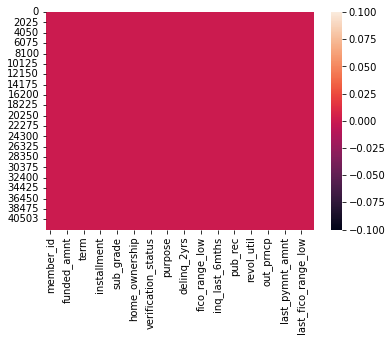

In [39]:
#To visualize if null value are there or not
sb.heatmap(df.isnull())
plt.show()

#Pink color indicate that null vlaue are not there

In [40]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.sub_grade)
le.classes_

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

Working on Target Variable

Loan_Class is our Target variable with two categories Good Loan and Bad Loan
For Good Loan we are considering categories from loan_status 1- Current 2- Fully Paid 3- Issued and 4- Does not meet the credit policy. Status:Fully Paid Since Current loan could be a Good Loan or a Bad Loan in future which as for now we are considering to be a Good Loan

Our Target Varible is Loan_Class where 1 = Good Loan and 0 = Bad Loan



In [41]:
df["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1962
Does not meet the credit policy. Status:Charged Off      758
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [42]:
# Create a target variable "Loan Status" with two categories Good and Bad Loan
df["Loan_Class"] = np.where((df.loan_status == 'Current') |
                        (df.loan_status == 'Fully Paid') |
                        (df.loan_status== "Issued") |
                        (df.loan_status == 'Does not meet the credit policy. Status:Fully Paid'), 1, 0)

In [43]:
#To see if duplicate value are present or not
df.duplicated().sum()

0

Text(0, 0.5, 'Loan Amount')

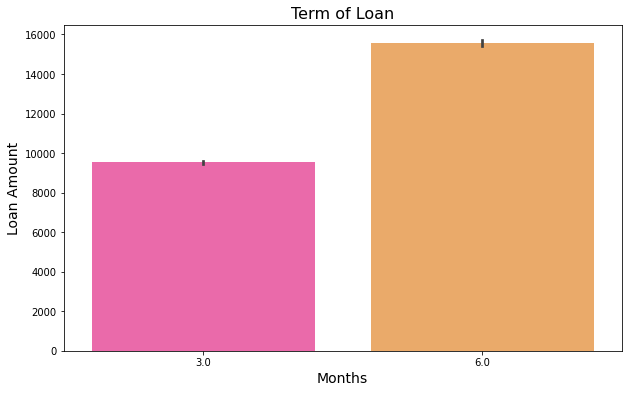

In [44]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(10,6))
sb.barplot("term", "loan_amnt", data=df, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

Text(0.5, 1.0, 'Frequency Distribuition- Loan Amount')

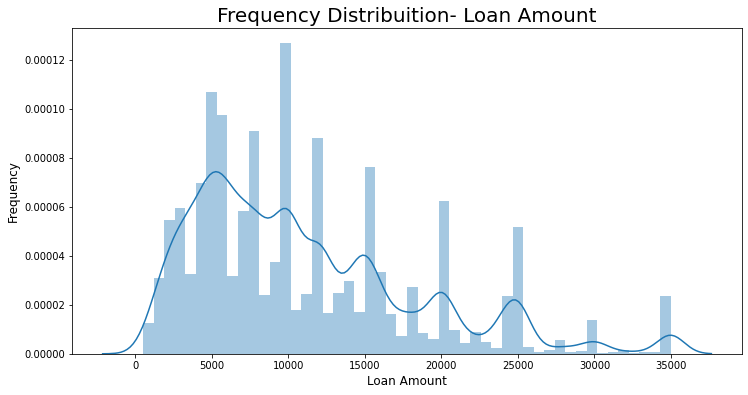

In [45]:
# Frequency distribution of Loan Amount
plt.figure(figsize=(12,6))
g = sb.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

Text(0.5, 1.0, 'Int Rate Distribuition')

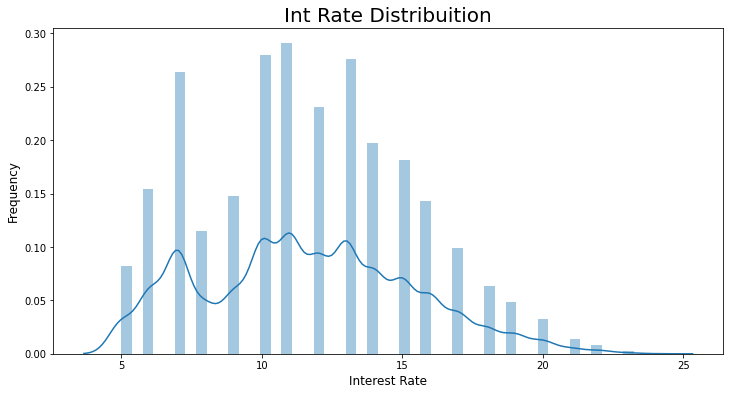

In [46]:
#Frequency distribution of Interest Rate
plt.figure(figsize=(12,6))
g = sb.distplot(df["int_rate"])
g.set_xlabel("Interest Rate", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Int Rate Distribuition", fontsize=20)

Text(0, 0.5, 'Loan Amount')

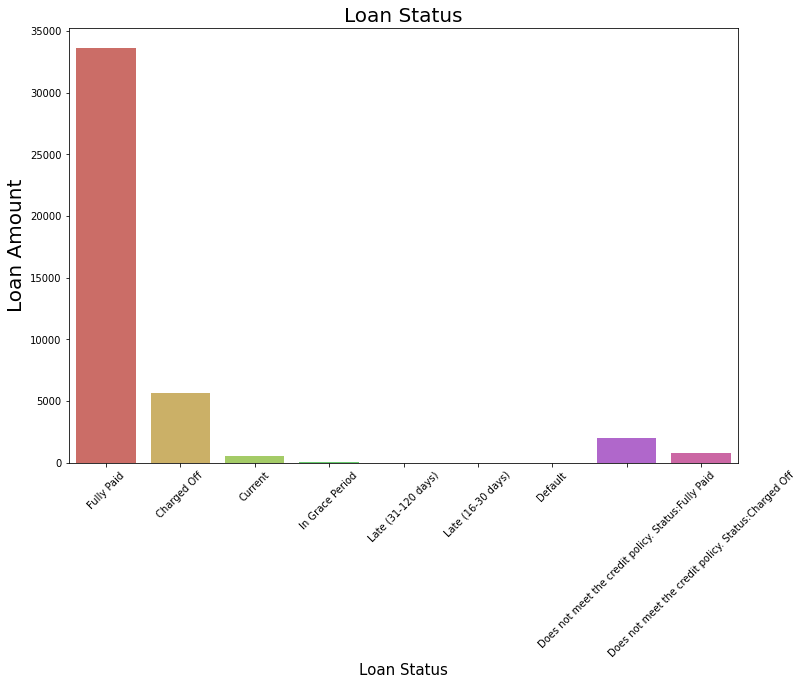

In [47]:
# Loan Status vs Loan Amount
plt.figure(figsize = (12,8))
g = sb.countplot(x="loan_status",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=20)

Text(0, 0.5, 'Loan Amount')

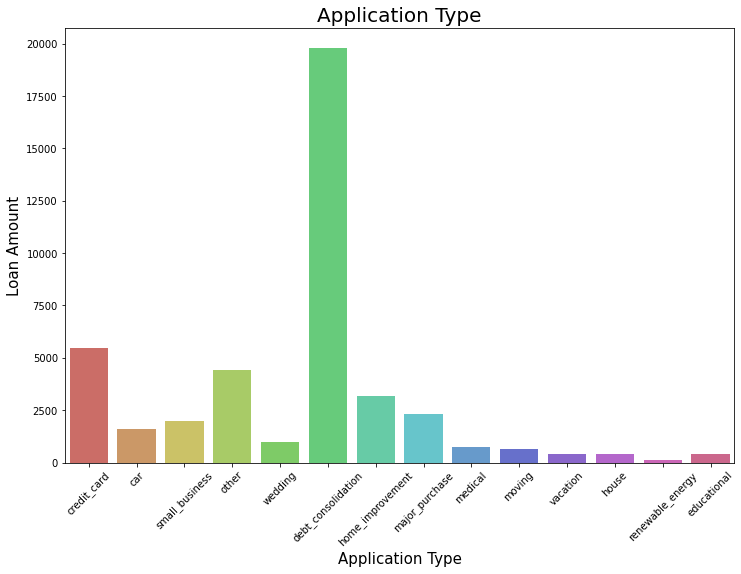

In [48]:
# Application Type and Loan Amount
plt.figure(figsize = (12,8))
g = sb.countplot(x="purpose",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Application Type", fontsize=20)
g.set_xlabel("Application Type", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

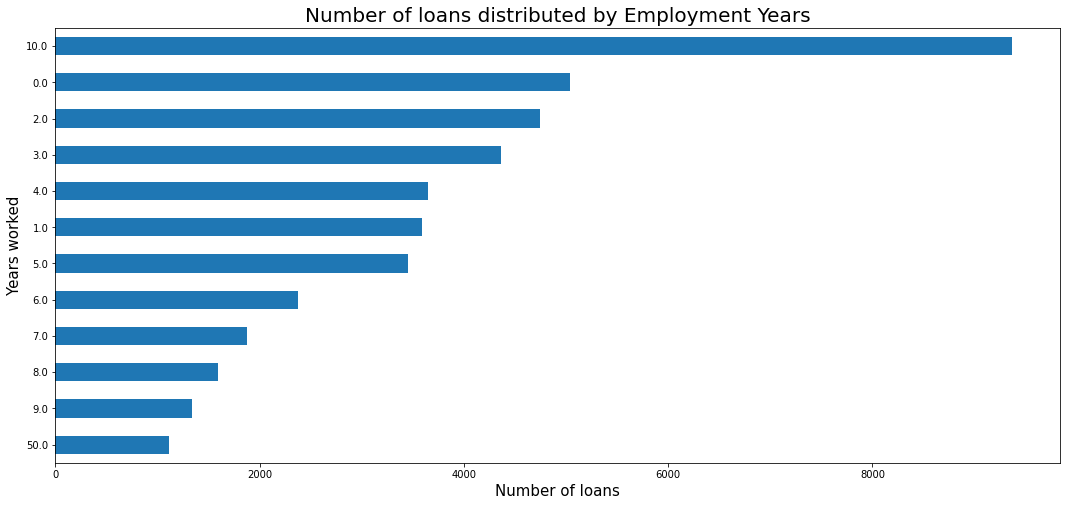

In [49]:
# Employment Length and Number of Loans
df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

In [50]:
# categorical_features.columns

cols= ['sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose','earliest_cr_line']
for i in cols:
    lbl= LabelEncoder()
    lbl.fit(list(df[i].values))
    df[i]= lbl.transform(list(df[i].values))

In [51]:
#To select input and output
X=df.drop('Loan_Class',axis=1)
Y=df['Loan_Class']

In [52]:
#To split the dataset into training an testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [53]:
#To see numbers of data in training 
X_train.shape,Y_train.shape

((29754, 32), (29754,))

In [54]:
#To see number of data in testing
X_test.shape,Y_test.shape

((12752, 32), (12752,))

In [55]:
#To apply StandardScaler
#To apply Scaling
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

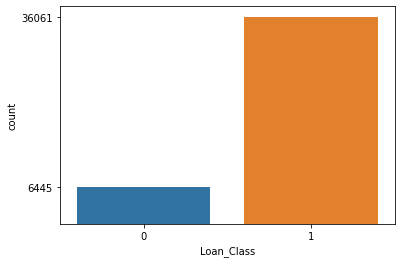

In [56]:
#To visualize the income to see the balance
sb.countplot(data=df,x='Loan_Class')
f=df['Loan_Class'].value_counts()
plt.yticks(f)
plt.show()
#As we can clearly see that the column is unbalanced
#We will balance it further

In [57]:
#Now we are balancing the dataser
#We use RandomOverSampler
#As RandomOverSampler convert the minority-sample to majority-sample
#To balance the target column 
from imblearn.over_sampling import RandomOverSampler
#create the object
ros=RandomOverSampler(random_state=1)
#To apply ros in training dataset
X_train,Y_train=ros.fit_resample(X_train,Y_train)
#To apply ros in testing dataset
X_test,Y_test=ros.fit_resample(X_test,Y_test)

In [58]:
#To see that the training data is balance or not
Y_train.value_counts()
#As we can see that the training data is balanced

0    25209
1    25209
Name: Loan_Class, dtype: int64

In [59]:
#To see that the testing data is balance or not
Y_test.value_counts()
#As we can see that the training data is balanced
#Now the data is balanced

1    10852
0    10852
Name: Loan_Class, dtype: int64

Creating the function to speedup the model building process

In [60]:
#We create the model which train,test, give classification_report and confusion_matrix
#It saves the time
def model(model):
    #To train the data
    model.fit(X_train,Y_train)
    #To test the data
    Y_pred=model.predict(X_test)
    #To give classification_report
    print(classification_report(Y_test,Y_pred))
    #To give confusion_matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

Applying Logistic Regression

In [61]:
#create the object of LogisticRegression
lr=LogisticRegression()
#Give the object to the function
lr=model(lr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10852
           1       0.99      0.99      0.99     10852

    accuracy                           0.99     21704
   macro avg       0.99      0.99      0.99     21704
weighted avg       0.99      0.99      0.99     21704

[[10776    76]
 [  138 10714]]


As We are getting excellent accurracy 
SO we are not using other algorithms so 
The Acurracy of the model is with recall=99% and F1score=99%